# 1. Importation des modules

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# 2. Importation de la base et première analyse

In [14]:
df = pd.read_csv("../data/AmesHousing.csv")

In [15]:
def is_remod(x):
    """
    Check if a property has been remodeled.

    This function compares the "Year Built" and "Year Remod/Add" values of a property 
    to determine whether the property has been remodeled or not. If the "Year Built" 
    value is not equal to the "Year Remod/Add" value, it indicates that the property 
    has been remodeled.

    Parameters:
    x (pandas.Series): A pandas Series containing the "Year Built" and "Year Remod/Add" 
                       values of a property.

    Returns:
    int: Returns 1 if the property has been remodeled (i.e., "Year Built" is not equal 
         to "Year Remod/Add"), otherwise returns 0.

    """
    if x["Year Built"] != x["Year Remod/Add"]:
        return 1
    else:
        return 0


df["is_remod"] = df[["Year Built","Year Remod/Add"]].apply(is_remod,axis=1)

In [16]:
def test_chi2(data:pd.DataFrame,first_cat : str,second_cat:str,values =None, aggfunc=None,graph=True,alpha : float = 0.05):
    """
    Cette fonction permet de realiser un test chi2
    
    Parameters:
    - data: pd.DataFrame
        Le dataframe
    - first_cat: str
        La premier categorie pour réaliser le test chi2
    - second_cat: str
        La deuxième categorie pour réaliser le test chi2
    - values: None | str
        La colonne des valeur souhaiter
    - aggfunc: str
        Fonction d'aggregation utiliser pour cree la table de contingence
    - graph: Bool defaut True
        affiche la heatmap de la table de contingence si la valeur est True
    - aplha: float defaut 0.05
        niveau de confiance

    """
    
    
    #Création d'une table de contingence
    if values is None:
        contingency_table = pd.crosstab(data[first_cat], data[second_cat])
    else:
        contingency_table = pd.crosstab(data[first_cat], data[second_cat],values=data[values],aggfunc=aggfunc)
    
    #Afichage de la heatmap si graph a pour valeur True
    if graph :
        # Création du heatmap
        sns.heatmap(contingency_table, cmap='Reds')

        # Affichage du heatmap
        plt.show()
    
    

    chi2_value, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    seuil = stats.chi2.ppf(1 - alpha, dof)
    if chi2_value > seuil :
        print(f"chi2: {chi2_value:.3f}, p-value: {p:.3f}, seuil:{seuil} \n","on rejette l'hypothèse nulle (c'est à dire qu'il y a une différence significative entre les valeurs observées et attendues)")
    else:
        print(f"chi2: {chi2_value:.3f}, p-value: {p:.3f}, seuil:{seuil} \n","on ne rejette pas l'hypothèse nulle (c'est à dire qu'il y a pas une différence significative entre les valeurs observées et attendues)")

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [18]:
df["Sale Condition"].value_counts()

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

In [19]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [21]:
df = df[df["Sale Condition"]!="Abnorml"]

In [22]:
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,is_remod
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,1


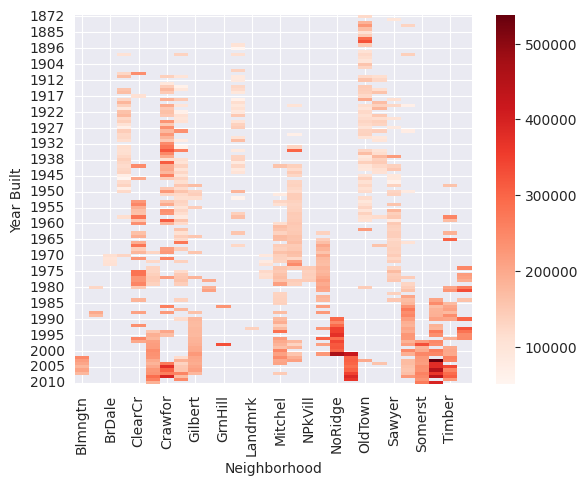

chi2: nan, p-value: nan, seuil:3235.747340418747 
 on ne rejette pas l'hypothèse nulle (c'est à dire qu'il y a pas une différence significative entre les valeurs observées et attendues)


In [31]:
test_chi2(df,first_cat="Year Built",second_cat="Neighborhood" ,values ="SalePrice", aggfunc="mean")

In [30]:
df["Year Built"]

2010

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2740.0,1.459709e+03,8.413351e+02,1.0,7.317500e+02,1468.5,2.180250e+03,2.930000e+03
PID,2740.0,7.121579e+08,1.887169e+08,526301100.0,5.284562e+08,535451220.0,9.071800e+08,1.007100e+09
MS SubClass,2740.0,5.736314e+01,4.230716e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2276.0,6.920387e+01,2.331737e+01,21.0,5.875000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2740.0,1.017713e+04,8.051929e+03,1300.0,7.447000e+03,9470.5,1.157950e+04,2.152450e+05
Overall Qual,2740.0,6.142336e+00,1.398702e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2740.0,5.580657e+00,1.092838e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2740.0,1.972319e+03,3.014672e+01,1872.0,1.954000e+03,1975.0,2.001250e+03,2.010000e+03
Year Remod/Add,2740.0,1.985070e+03,2.066066e+01,1950.0,1.967000e+03,1994.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2717.0,1.038892e+02,1.808782e+02,0.0,0.000000e+00,0.0,1.670000e+02,1.600000e+03


In [35]:
df["Bedroom AbvGr"]

0       3
1       2
2       3
3       3
4       3
       ..
2925    3
2926    2
2927    3
2928    2
2929    3
Name: Bedroom AbvGr, Length: 2740, dtype: int64

In [33]:
df[df["SalePrice"] <40000]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,is_remod
1901,1902,534450090,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300,1
2843,2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,498.0,498.0,GasA,TA,N,FuseF,498,0,0,498,0.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,Detchd,1922.0,Unf,1.0,216.0,Fa,Fa,N,0,0,100,0,0,0,NaN,NaN,NaN,0,2,2006,ConLD,Normal,35000,1


/tmp/ipykernel_39283/3424911888.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"], kde = True, hist=True, fit = stats.norm, ax = ax[1])


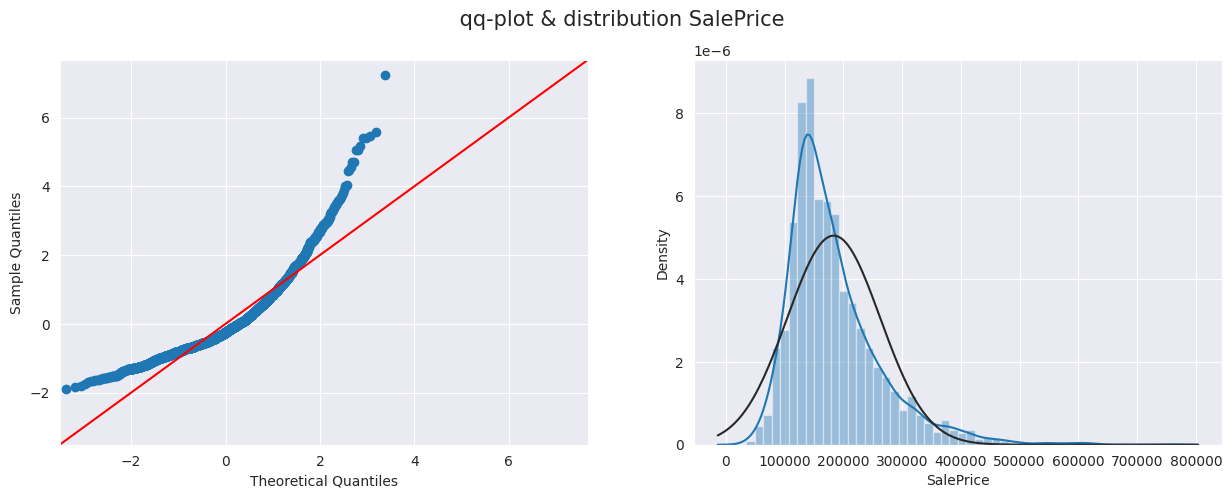

In [38]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df["SalePrice"], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(df["SalePrice"], kde = True, hist=True, fit = stats.norm, ax = ax[1])
plt.show()

/tmp/ipykernel_39283/2676977462.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde = True, hist=True, fit = stats.norm, ax = ax[1])


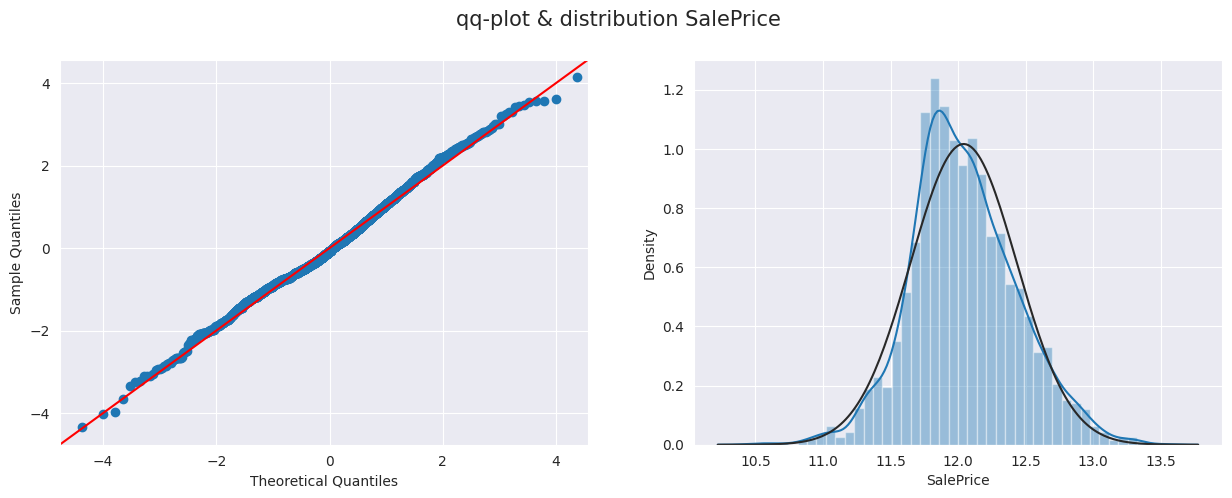

In [40]:

target_log = np.log(df["SalePrice"])

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = stats.norm, ax = ax[1])
plt.show()

# 3. séparation des jeux entre train et split pour ne pas avoir de data leaking

In [55]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. nettoyage de données

In [57]:
df = pd.concat((X_train,y_train), axis =1)
df.shape

(2192, 83)

## Valeurs maquantes

On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [58]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [59]:
df.shape

(2192, 76)

# 4. Analyse de données

In [60]:
df.iloc[:,0:15]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style
1534,50,RL,NaN,9260,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Feedr,Norm,1Fam,1.5Fin
705,50,RM,50.0,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin
1713,20,RL,71.0,9254,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story
1718,120,RL,41.0,6289,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story
1978,30,RM,56.0,3153,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,20,RL,59.0,10936,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story
1167,120,FV,NaN,4765,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story
1204,20,RL,74.0,7785,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story
1388,20,RL,NaN,8544,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story


In [61]:
cat_col = ['MS SubClass', 'MS Zoning',
        'Street','Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
        'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1',  'BsmtFin Type 2', 
        'Heating', 'Heating QC', 'Central Air',
        'Electrical',  'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
        'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
        'Garage Finish', 'Garage Cars', 
        'Garage Qual', 'Garage Cond', 'Paved Drive',  'Enclosed Porch', '3Ssn Porch',  'Mo Sold',  'Sale Type',
        'Sale Condition']

num_col = ['Lot Frontage', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
        'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
        'Gr Liv Area','Garage Yr Blt', 'Garage Area','Wood Deck SF',
        'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val','Yr Sold', "Enclosed Porch", "3Ssn Porch",  'SalePrice']

## Analyse des variables quantitatives

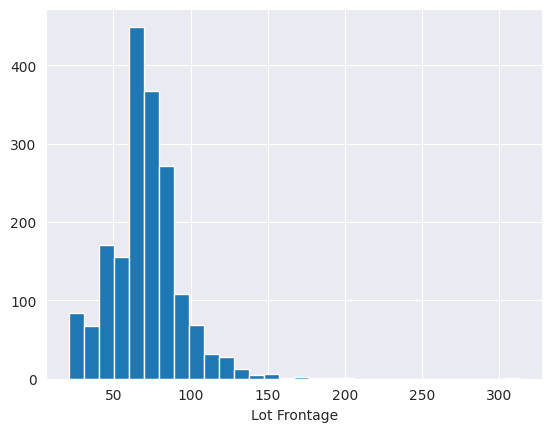

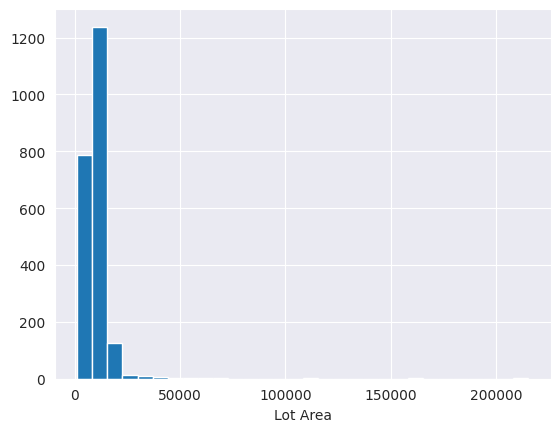

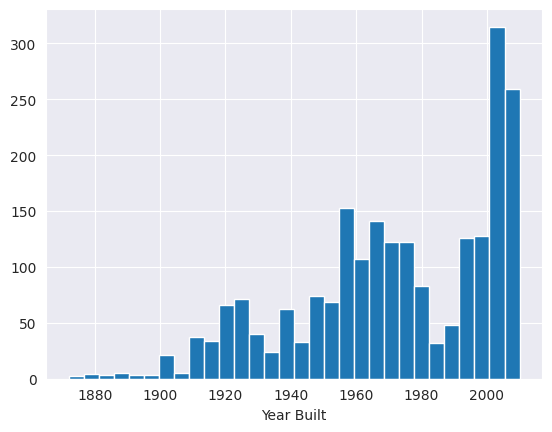

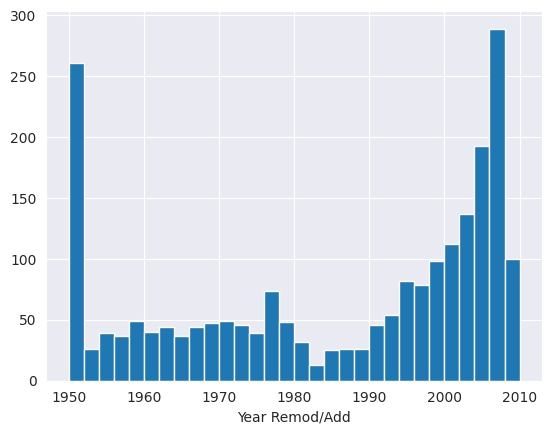

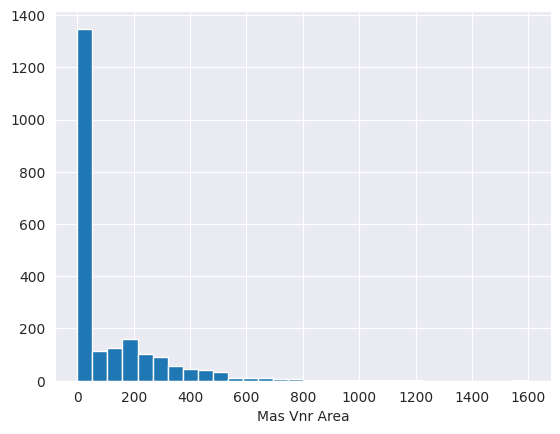

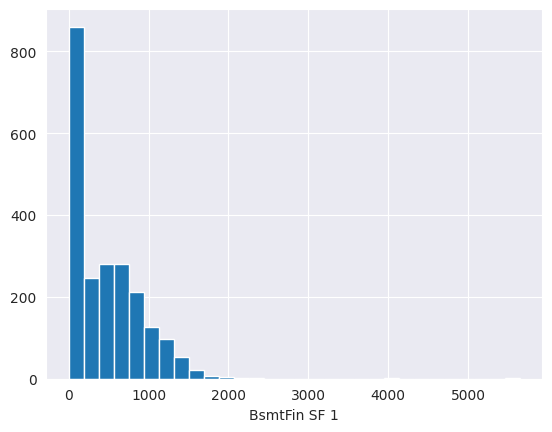

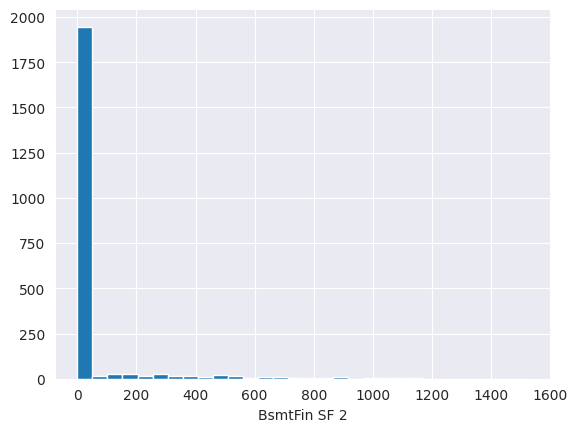

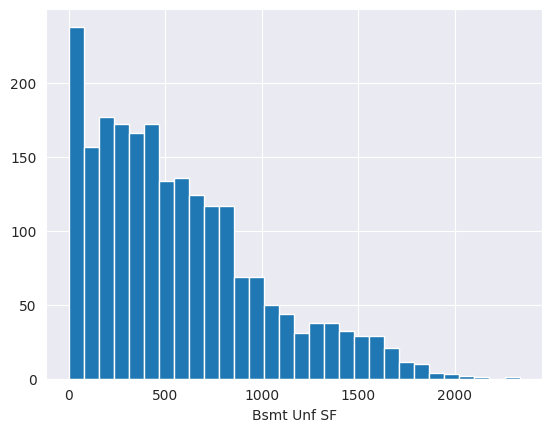

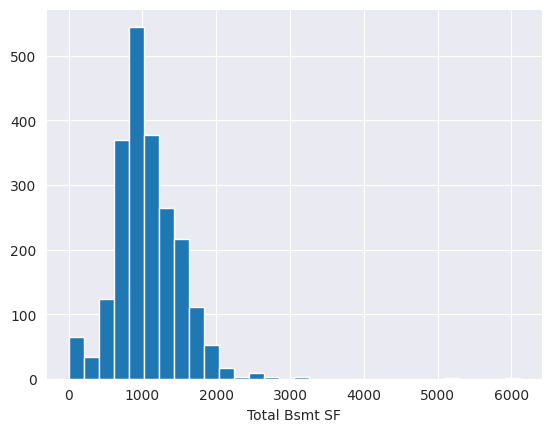

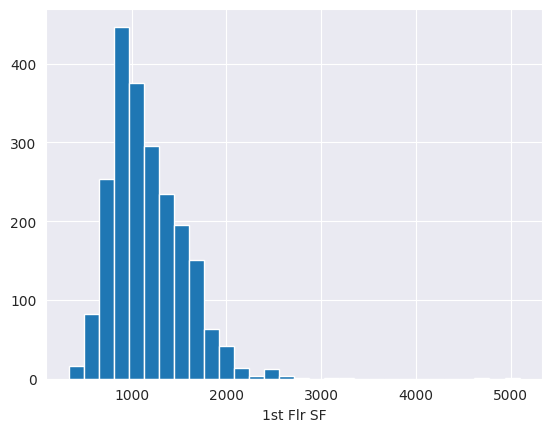

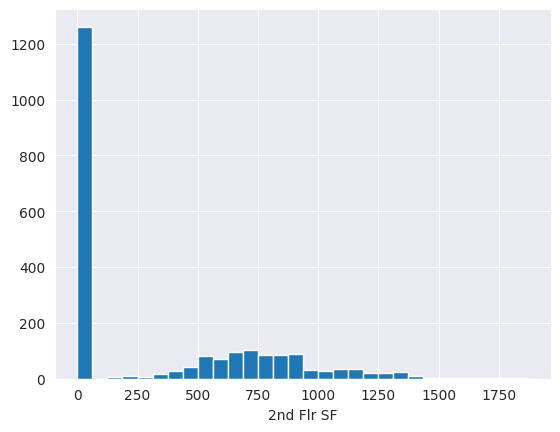

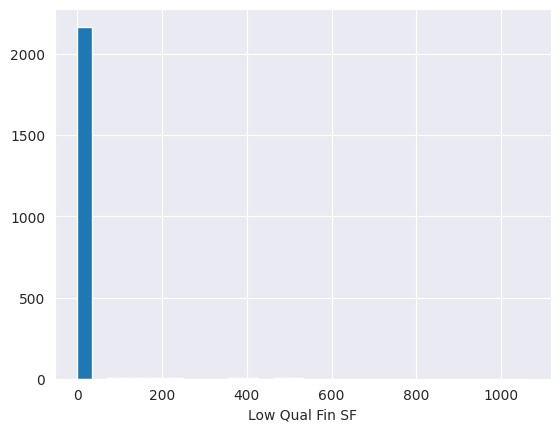

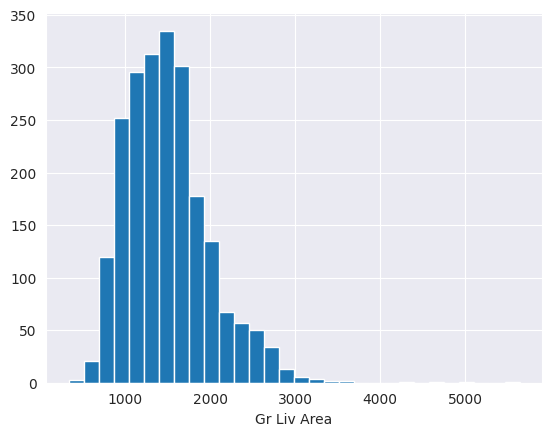

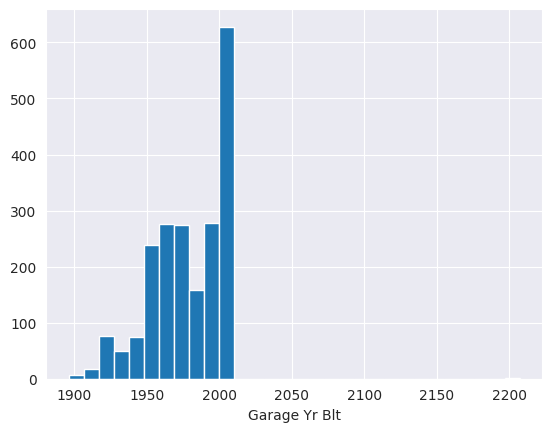

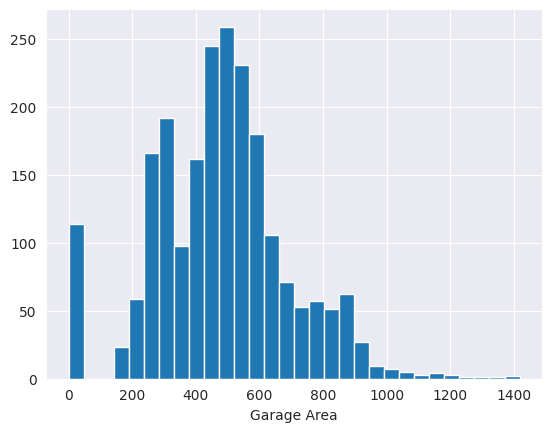

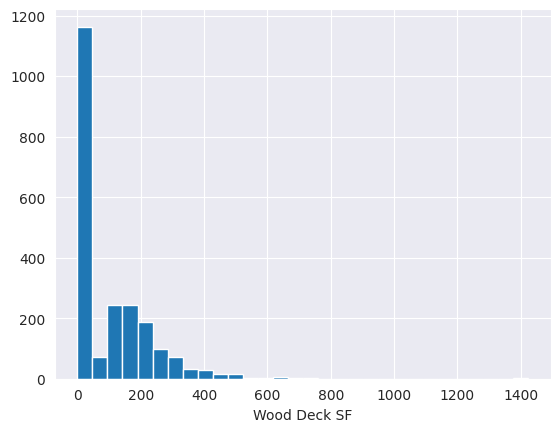

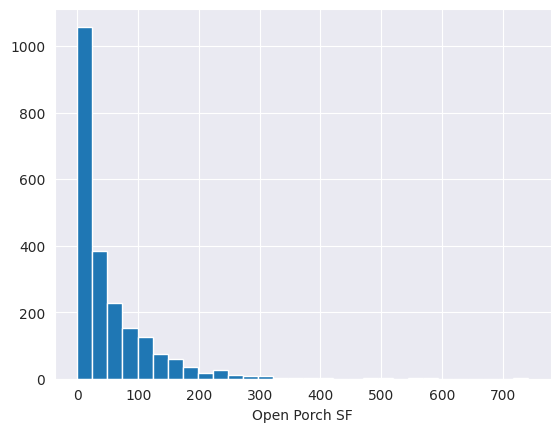

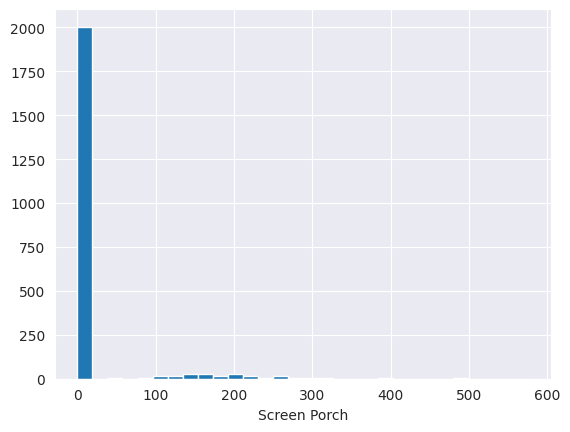

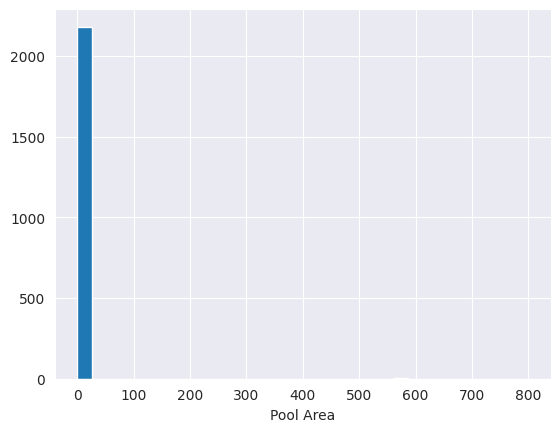

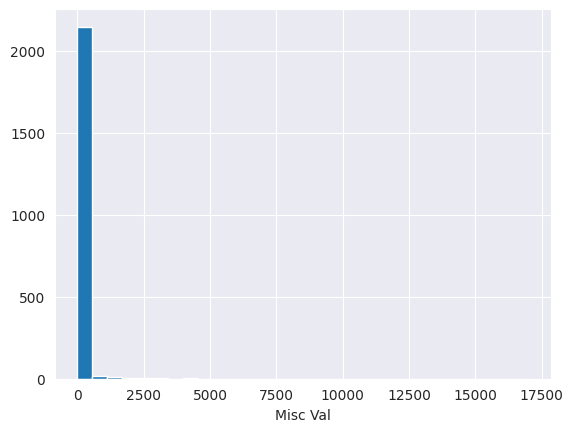

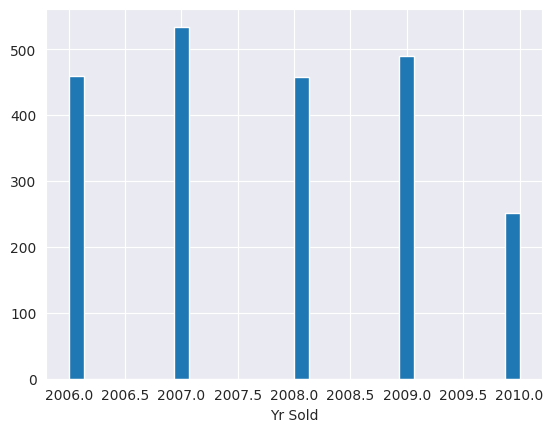

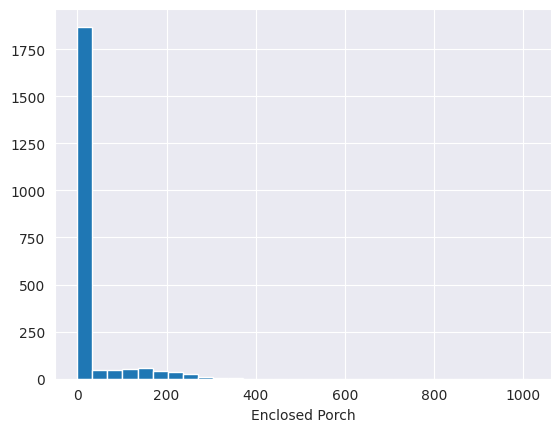

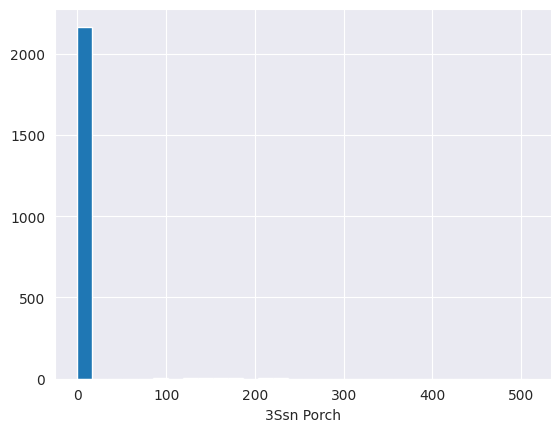

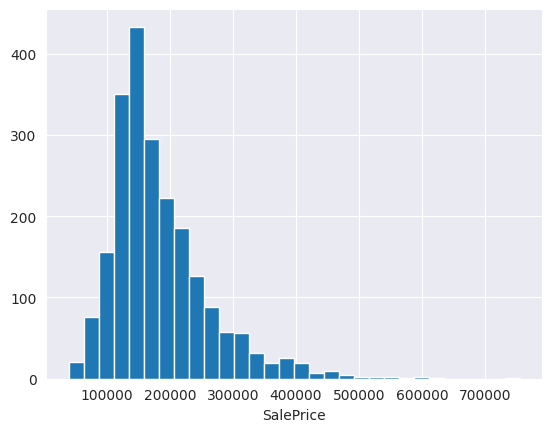

In [62]:
for col in num_col:
    plt.figure()
    plt.hist(x=df[col], bins=30)
    plt.xlabel(col)
    plt.show()

On supprimer les colonnes avec une valeur unique

In [63]:
to_drop = [ 'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [64]:
df= df.drop(to_drop,axis=1)

## Analyse des variables catégorielles

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [65]:
highly_unbalanced_col = ["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]

unbalanced_col = ["Land Slope", "Land Contour", "Condition 1", "Bldg Type", "Exter Cond", "Bsmt Cond", 
            "BsmtFin Type 2", "Central Air", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]

In [66]:
df = df.drop(highly_unbalanced_col, axis=1)

In [67]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Enclosed Porch', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition',
       'i

In [68]:
df[["Land Slope", "SalePrice"]].groupby(by="Land Slope").mean()


,SalePrice
Land Slope,
Gtl,181984.641455
Mod,211260.366667
Sev,213265.384615


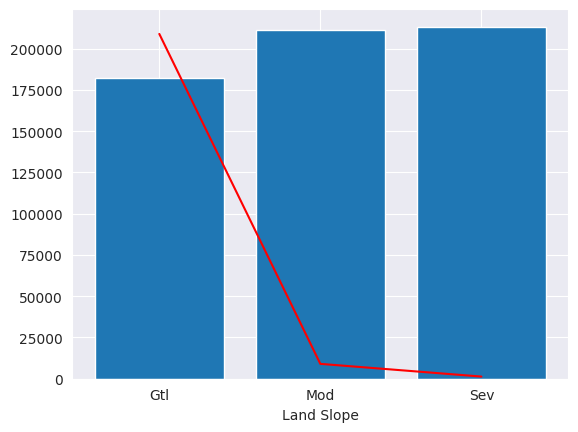

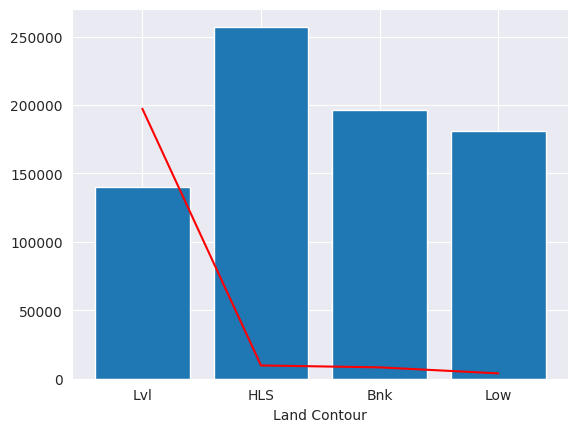

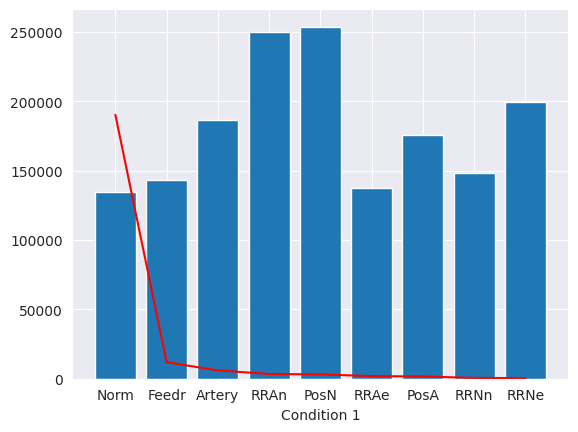

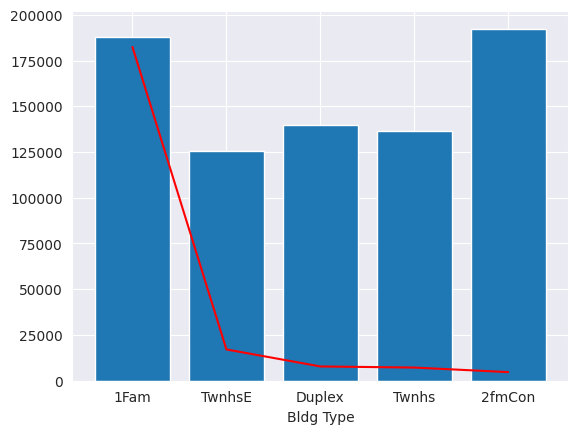

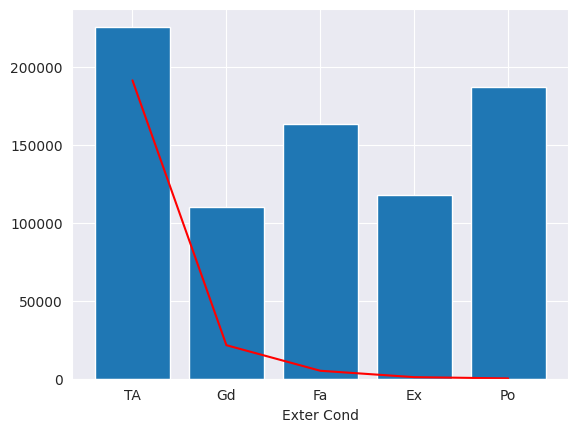

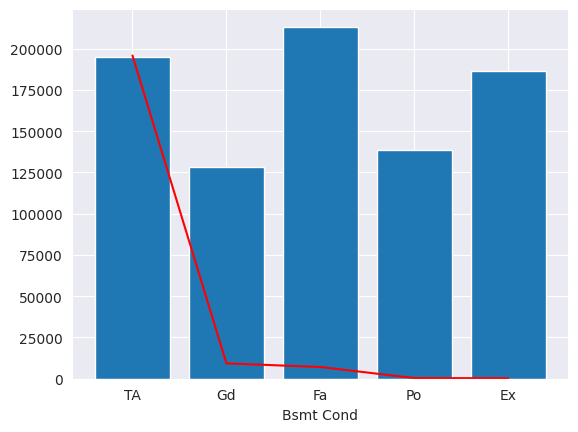

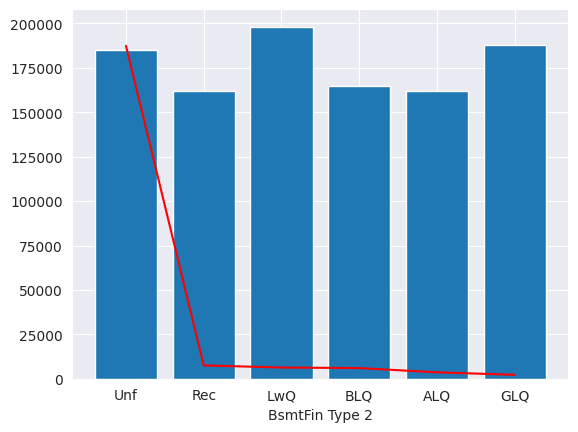

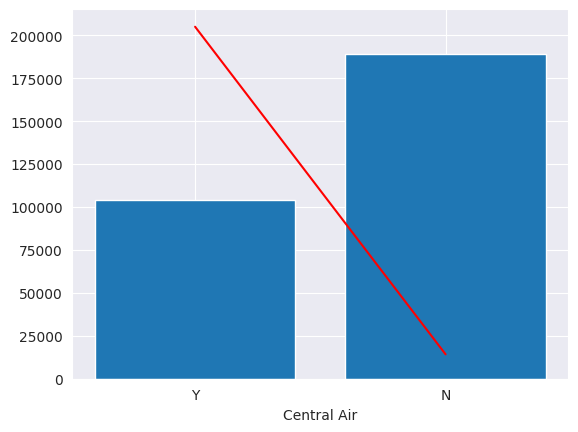

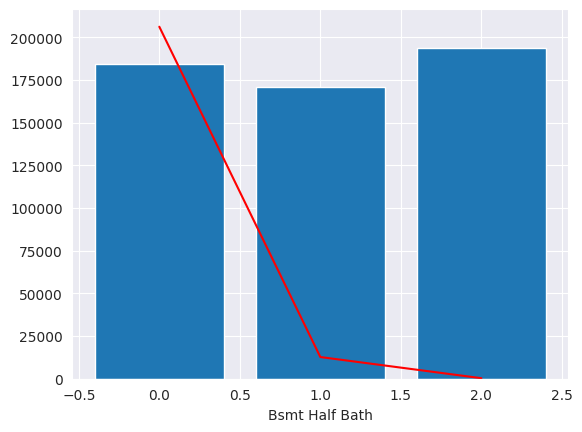

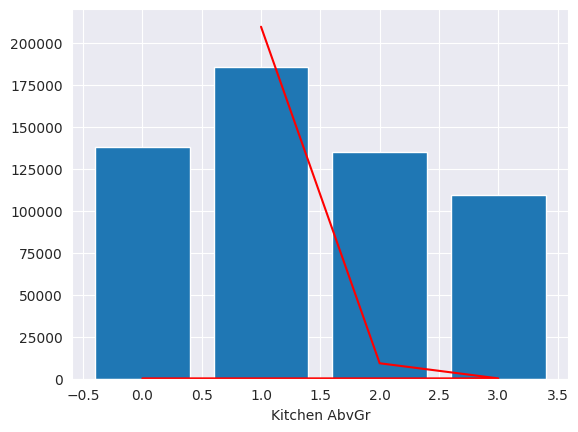

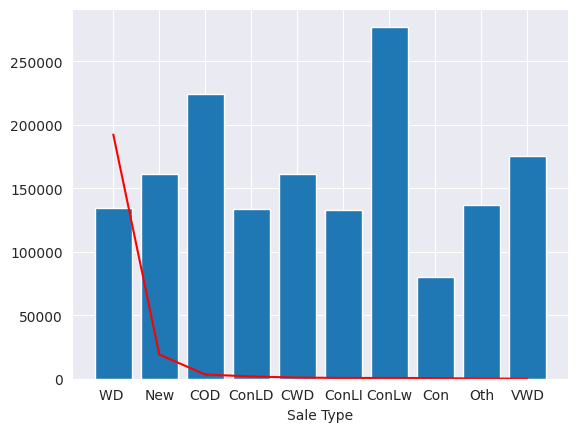

In [69]:
for i,col in enumerate(unbalanced_col,1): 
    plt.figure()
    df_fig = df[[col, "SalePrice"]].groupby(by=col).mean()
    plt.bar(df_fig.index, df_fig.SalePrice)
    df[col].value_counts().apply(lambda x:x*100).plot(kind='line',c="red")
    plt.xlabel(col)
    plt.show()

In [70]:
to_keep = [ "Land Contour", "Bldg Type", "Exter Cond", "Bsmt Cond",  "Central Air"]
to_drop =  ["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
df = df.drop(to_drop, axis=1)

In [71]:
["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"]
["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]
['BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch','Pool Area', 'Misc Val', "3Ssn Porch"]

['BsmtFin SF 2',
 'Low Qual Fin SF',
 'Open Porch SF',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 '3Ssn Porch']

## Analyse des corrélations

In [72]:
df.shape

(2192, 55)

In [73]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [74]:
complete_correlation= associations(df,compute_only=True)

In [75]:
complete_correlation["corr"]["SalePrice"].abs().sort_values(ascending=False).to_frame().iloc[0:15].T.columns

Index(['SalePrice', 'Overall Qual', 'Neighborhood', 'Exter Qual', 'Bsmt Qual',
       'Kitchen Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Garage Finish', 'Year Remod/Add'],
      dtype='object')

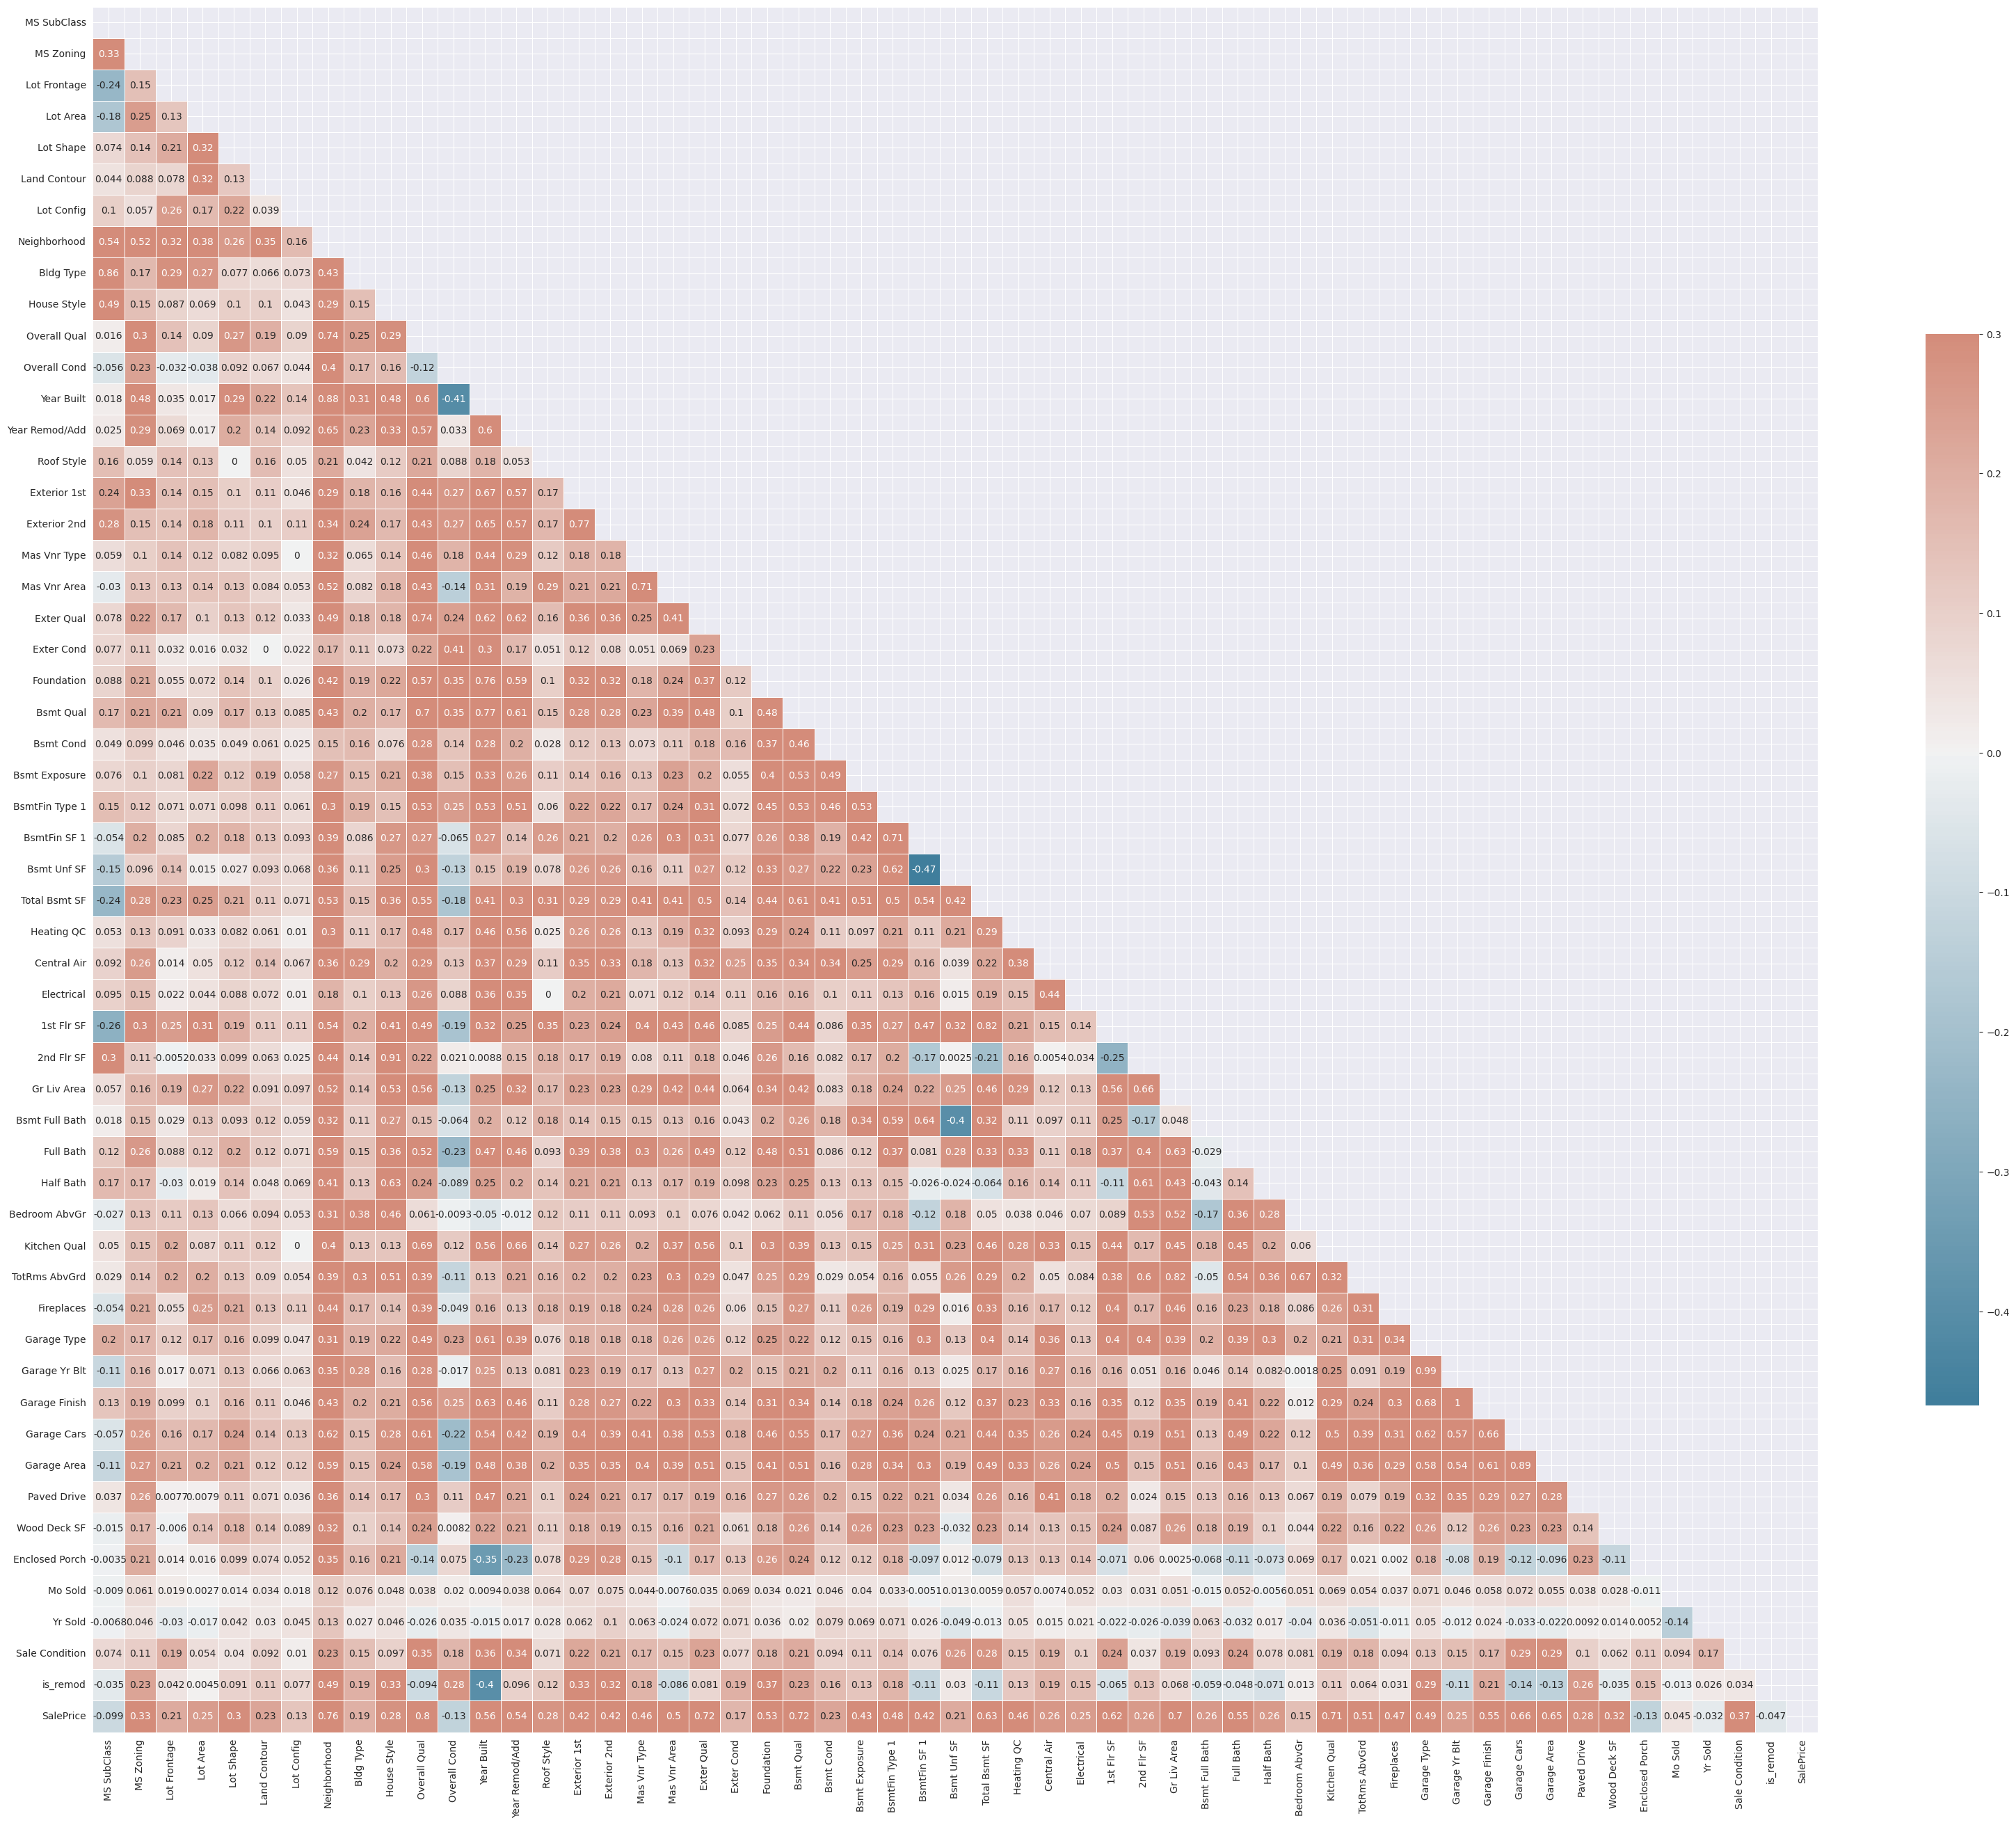

In [76]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [77]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'is_remod', 'SalePrice'],
      dtype='object')

In [78]:
sub_selection = [ 'Overall Qual', 'Neighborhood', 'Bsmt Qual', 'Gr Liv Area',
       'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Garage Finish', 'Foundation','SalePrice']

In [119]:
df_sub_selection = df[sub_selection]
df_sub_selection["Garage Area^2"] = df_sub_selection["Garage Area"] * df_sub_selection["Garage Area"]


/tmp/ipykernel_14578/3897791111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_selection["Garage Area^2"] = df_sub_selection["Garage Area"] * df_sub_selection["Garage Area"]


In [120]:
df_sub_selection.columns

Index(['Overall Qual', 'Neighborhood', 'Bsmt Qual', 'Gr Liv Area',
       'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Garage Finish', 'Foundation', 'SalePrice', 'Garage Area^2'],
      dtype='object')

In [121]:
df_sub_selection = df_sub_selection[['Overall Qual', 'Neighborhood', 'Bsmt Qual', 'Gr Liv Area',
       'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Garage Finish', 'Foundation',
       'Garage Area^2', 'SalePrice']]

<Axes: >

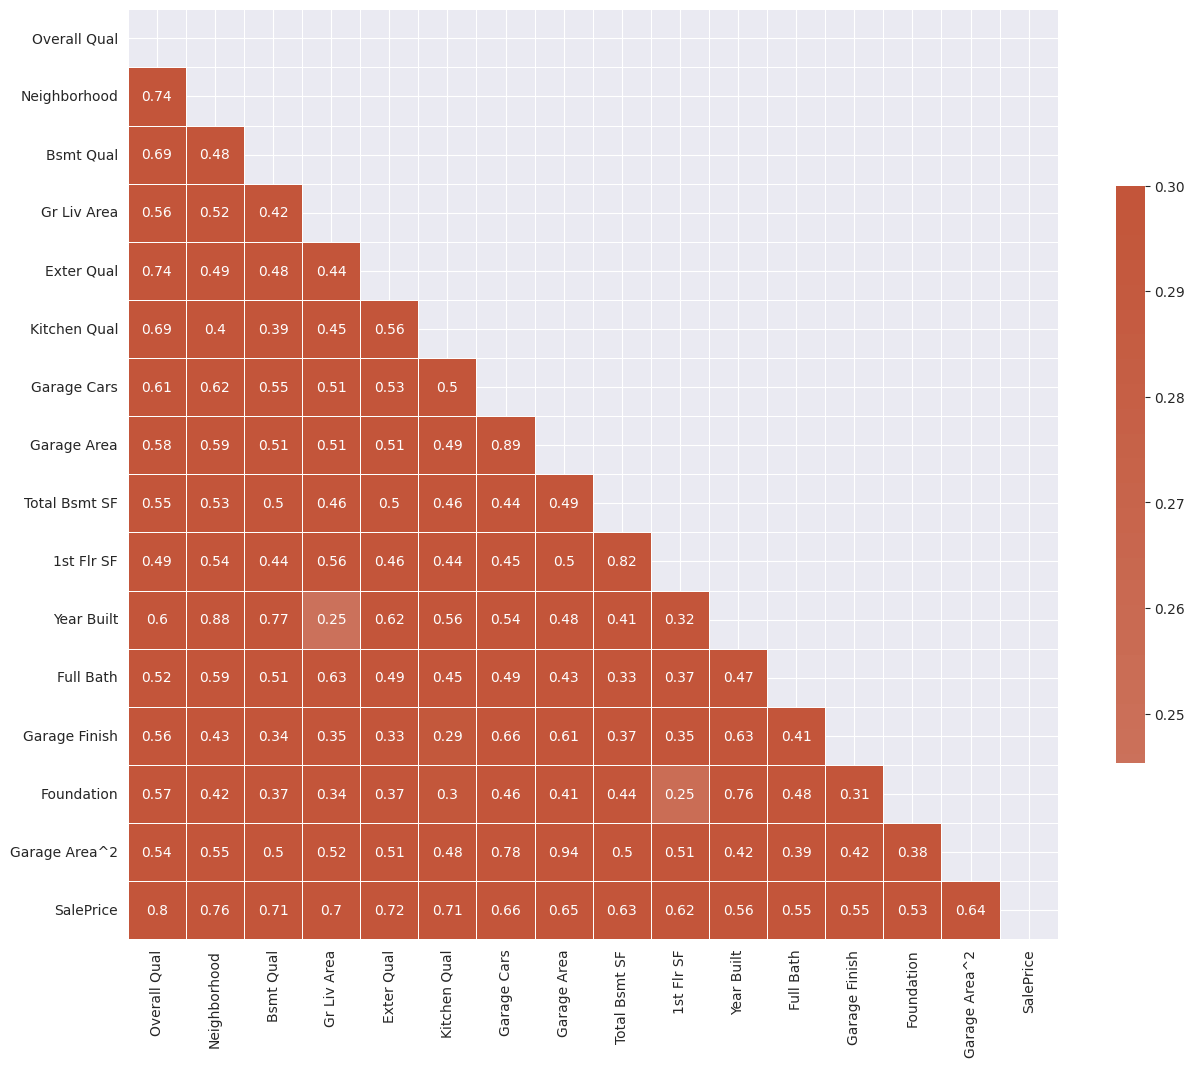

In [122]:
sub_correlation= associations(df_sub_selection,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# Préparation des données en vue du modèle

In [123]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [124]:
df[num_selected].isna().sum()

Year Built       0
Total Bsmt SF    0
1st Flr SF       0
Gr Liv Area      0
Garage Area      0
SalePrice        0
dtype: int64

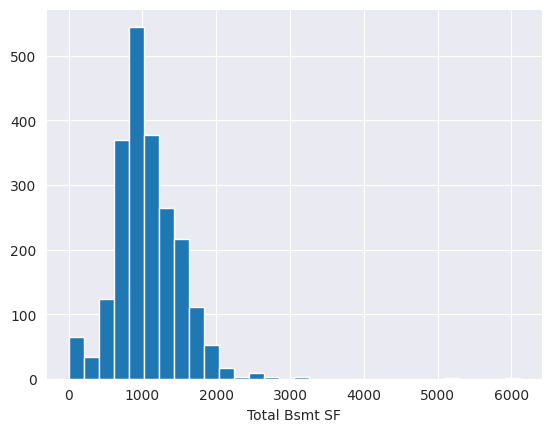

In [125]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [126]:
df["Total Bsmt SF"].mean()

1058.2714416058395

In [127]:
df["Total Bsmt SF"].fillna(1052, inplace=True)

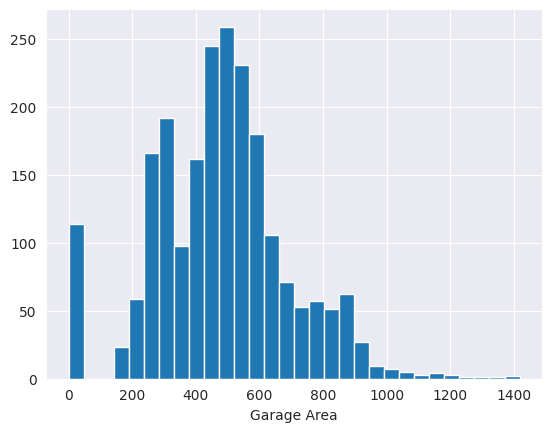

In [128]:
plt.figure()
plt.hist(x=df["Garage Area"], bins=30)
plt.xlabel("Garage Area")
plt.show()

In [129]:
df["Garage Area"].mean()

475.6669708029197

In [130]:
df["Garage Area"].fillna(472, inplace=True)

In [131]:
df[cat_num].isna().sum()

Overall Qual    0
Full Bath       0
Garage Cars     0
dtype: int64

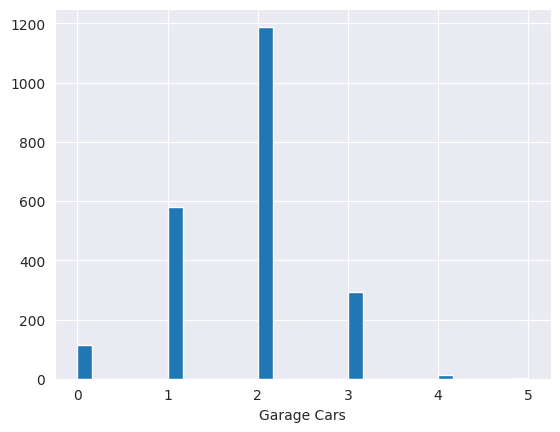

In [132]:
plt.figure()
plt.hist(x=df["Garage Cars"], bins=30)
plt.xlabel("Garage Cars")
plt.show()

In [133]:
df["Total Bsmt SF"].fillna(2, inplace=True)

In [134]:
df[cat_str].isna().sum()

Neighborhood       0
Exter Qual         0
Bsmt Qual          0
Kitchen Qual       0
Garage Finish    115
dtype: int64

In [135]:
df["Bsmt Qual"].value_counts()

TA    1002
Gd     924
Ex     202
Fa      63
Po       1
Name: Bsmt Qual, dtype: int64

In [136]:
df["Bsmt Qual"].fillna("TA", inplace=True)

In [137]:
df["Garage Finish"].value_counts()

Unf    893
RFn    631
Fin    553
Name: Garage Finish, dtype: int64

In [138]:
df["Land Slope"].value_counts().plot(kind='bar')

KeyError: 'Land Slope'

In [ ]:
df["Bsmt Qual"].fillna("Unf", inplace=True)